In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/neo-stark-team/Datasets/main/Mall_Customers.csv",names=["cust_id","gender","age","income","spending_score"],skiprows=1)
df


,cust_id,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

cust_id           0
gender            0
age               0
income            0
spending_score    0
dtype: int64

In [ ]:
Q3=df.income.quantile(.75)
Q1=df.income.quantile(.25)
print(Q3)
print(Q1)

78.0
41.5


In [ ]:
iqr=Q3-Q1
iqr

36.5

In [ ]:
ul=Q3+1.5*iqr
ll=Q1-1.5*iqr
ul
ll

-13.25

In [ ]:
outliers=df[~((df.income<ll)|(df.income>ul))]
outliers

,cust_id,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


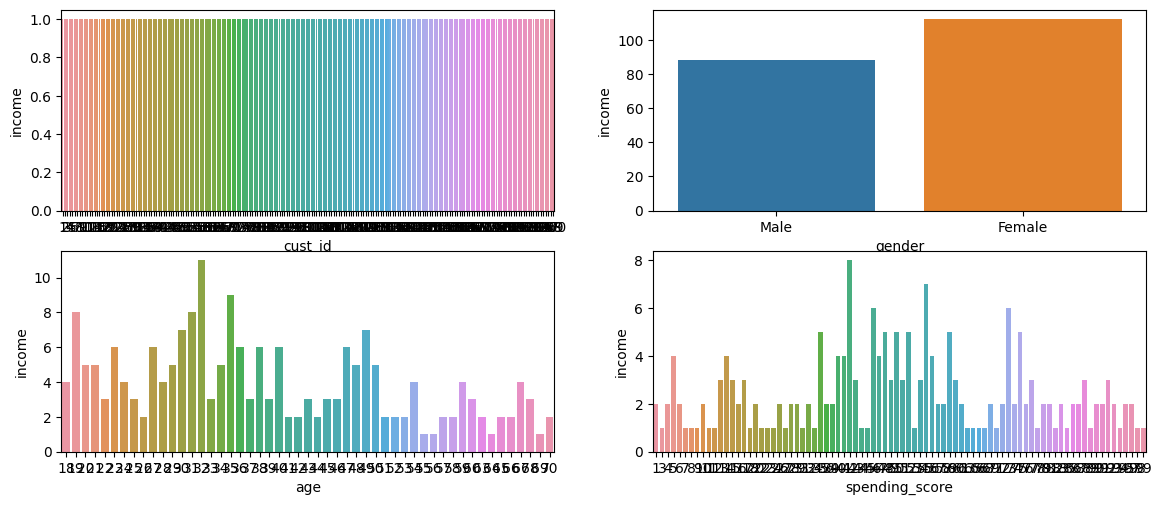

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x = df.drop("income",axis=1)
plt.figure(figsize=(14,12))
for i, col in enumerate(x,1):
  plt.subplot(4,2,i)
  sns.countplot(data = df,x = col)
  plt.xlabel(col)
  plt.ylabel('income')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
kmeans.fit(x_scaled)

df["cluster"]=kmeans.labels_
df


,cust_id,gender,age,income,spending_score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg=silhouette_score(x, kmeans.labels_)

print(silhouette_avg)

0.553931997444648
